In [2]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [3]:
import torch
import random
import numpy as np
from d2l import torch as d2l

random.seed(7)
np.random.seed(7)

In [4]:
X = torch.randn(4,5)

In [5]:
X

tensor([[-1.9037, -0.0583,  1.2027,  1.8858, -0.7861],
        [ 0.7584, -0.9817, -0.5495, -0.2697,  0.5153],
        [ 0.6369,  2.4853,  0.4367,  1.1907,  1.3554],
        [ 0.1561,  0.5258,  1.4981,  1.0573,  0.8730]])

In [6]:
len(X)

4

In [7]:
len(list(range(0, 1000, 10)))

100

In [8]:
w_true = [2, -3.4]
b_true = 4.2
num_sample = 1000
batch_size = 10
lr = 0.03
epochs = 5

In [9]:
# 生成数据集
def generate_data(num_sample, w_true):
    X = torch.normal(0, 1, size=(num_sample, len(w_true)))
    y = torch.matmul(X, torch.tensor(w_true)) + b_true
    y += torch.normal(0, 0.01, size=(y.shape))
    return X,y

In [10]:
# X 是样本    y是标签
X,y = generate_data(num_sample, w_true)

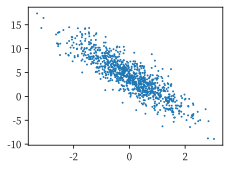

In [11]:
# 可视化数据集
d2l.set_figsize()
d2l.plt.scatter(X[:, 1].detach().numpy(), y.detach().numpy(), 1);

In [12]:
# 小批量取样  批次大小为10
def get_batch(num_sample, X, y, batch_size):
    indices = list(range(num_sample))
    np.random.shuffle(indices)
    #print('indices is:')
    #print(indices)
    for i in range(0, num_sample, batch_size):
        #print(i)
        #print(indices[i:(i+batch_size)])
        #print(y[indices[i:(i+batch_size)]])
        yield X[indices[i:(i+batch_size)],:], y[indices[i:(i+batch_size)]]

In [13]:
for X_, y_ in get_batch(num_sample, X, y, batch_size):
    print(X_, '\n', y_)
    break

tensor([[ 0.8948,  0.3924],
        [-1.3441,  1.5680],
        [-0.9153, -1.8477],
        [ 1.0034, -0.7095],
        [ 0.5415, -0.4095],
        [ 0.2256, -0.2778],
        [-0.1084, -0.2668],
        [-0.3101, -0.3500],
        [-1.3928,  3.0331],
        [-0.5841,  1.0190]]) 
 tensor([ 4.6441, -3.8108,  8.6587,  8.6257,  6.6813,  5.6009,  4.9028,  4.7617,
        -8.9092, -0.4242])


In [14]:
# 构建线性回归模型
def linear_model(X_, w_parma, b_param):
    y_hat = torch.matmul(X_, w_parma) + b_param
    return y_hat

In [38]:
# 初始化参数
# w_parma = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
w_parma = torch.zeros([2, 1], dtype=torch.float, requires_grad=True)
b_param = torch.zeros(1, requires_grad=True)

In [39]:
# 构建损失函数
def get_loss(X_, w_parma, b_param, y_):
    y_hat = linear_model(X_, w_parma, b_param)
    #print(y_hat.shape)
    #print(y_.shape)
    loss = (y_hat.reshape(y_.shape) - y_) ** 2 / 2
    return loss

In [40]:
# 构建参数优化器
def sgd(w_parma, b_param, lr, batch_size):
    with torch.no_grad():
        w_parma -= lr * w_parma.grad / batch_size
        b_param -= lr * b_param.grad / batch_size
        w_parma.grad.zero_()
        b_param.grad.zero_()

In [43]:
# 训练
for epoch in range(epochs):
    for X_, y_ in get_batch(num_sample, X, y, batch_size):
        loss = get_loss(X_, w_parma, b_param, y_)
        loss.sum().backward()
        sgd(w_parma, b_param, lr, batch_size)
    with torch.no_grad():
        train_loss = get_loss(X, w_parma, b_param, y)
        print(f'epoch {epoch + 1}, loss {float(train_loss.mean()):f}')

epoch 1, loss 0.000052
epoch 2, loss 0.000052
epoch 3, loss 0.000052
epoch 4, loss 0.000052
epoch 5, loss 0.000052


In [44]:
with torch.no_grad():
    print(w_parma.numpy() - np.array(w_true))
    print(b_param.numpy() - np.array(b_true))

[[ 3.66210938e-04  5.40036621e+00]
 [-5.39981866e+00  1.81341171e-04]]
[0.0001812]


In [32]:
with torch.no_grad():
    print(w_parma.numpy().reshape(2) - np.array(w_true))
    print(b_param - b_true)

[-4.22000885e-05  6.92272186e-04]
tensor([0.0004])


In [46]:
w_parma

tensor([[ 2.0004],
        [-3.3998]], requires_grad=True)

In [45]:
b_param

tensor([4.2002], requires_grad=True)

In [22]:
aa = torch.tensor([1.1,2.1])

In [23]:
aa.sum()

tensor(3.2000)

In [24]:
aa.mean()

tensor(1.6000)

### 线性回归的简单实现，使用nn模块

In [63]:
# 构建模型
net = torch.nn.Sequential(torch.nn.Linear(2, 1))

# 手动初始化参数
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

# 构建损失函数
# loss_f = torch.nn.MSELoss()
loss_f = torch.nn.HuberLoss(reduction='mean')

# 构建优化器
trainer = torch.optim.SGD(net.parameters(), lr=0.03)


# 训练
for epoch in range(epochs):
    for X_, y_ in get_batch(num_sample, X, y, batch_size):
        loss = loss_f(net(X_), y_.reshape(10,1))
        trainer.zero_grad()
        loss.backward()
        trainer.step()
    with torch.no_grad():
        train_loss = loss_f(net(X), y.reshape(1000,1))
        print(f'epoch {epoch + 1}, loss {float(train_loss):f}')

epoch 1, loss 2.243604
epoch 2, loss 0.415986
epoch 3, loss 0.001391
epoch 4, loss 0.000055
epoch 5, loss 0.000052


In [67]:
la = [1,2,3]
la.insert(0,2)
la

[2, 1, 2, 3]

In [68]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [73]:
y=np.array([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y[[0,1],[0]]

array([0.1, 0.3])

In [76]:
import numpy as np 
 
x = np.array([[  0,  1,  2],[  3,  4,  5],[  6,  7,  8],[  9,  10,  11]])  
print ('我们的数组是：' )
print (x)
print ('\n')
rows = np.array([0,0,3,3]) 
cols = np.array([0,2,0,2]) 
y = x[rows,cols]  
print  ('这个数组的四个角元素是：')
print (y)

我们的数组是：
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


这个数组的四个角元素是：
[ 0  2  9 11]


In [109]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

y = torch.tensor([0, 2])
y_hat = torch.tensor([[-1., 0., 0.], [0., 0., 1.0]])
cross_entropy(y_hat, y)

tensor([nan, -0.])

In [84]:
def cross_entropy_loss(y_true, y_pred):
    # 将输入转换为NumPy数组
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # 计算交叉熵损失
    loss = -np.sum(y_true * np.log(y_pred))
    return loss

In [88]:
y_true = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]  # 真实标签
y_pred = [[0.7, 0.2, 0.1], [0.3, 0.4, 0.3], [0.1, 0.1, 0.8]]  # 模型输出概率

total_loss = []
num_samples = len(y_true)

for i in range(num_samples):
    loss = cross_entropy_loss(y_true[i], y_pred[i])
    total_loss.append(loss)

print("平均交叉熵损失:", total_loss)

平均交叉熵损失: [0.35667494393873245, 0.916290731874155, 0.2231435513142097]


In [89]:
y = torch.tensor([0, 1, 2])
y_hat = torch.tensor([[0.7, 0.2, 0.1], [0.3, 0.4, 0.3], [0.1, 0.1, 0.8]])
cross_entropy(y_hat, y)

tensor([0.3567, 0.9163, 0.2231])

In [91]:
torch.log(torch.tensor(0.7))

tensor(-0.3567)

In [92]:
[0.0] * 2

[0.0, 0.0]

In [94]:
def add1(*args):
    data = [a + float(b) for a, b in zip(data, args)]

x = [0,1,2]
y = [2]

In [95]:
import sys
assert ('linux' in sys.platform), "该代码只能在 Linux 下执行"

AssertionError: 该代码只能在 Linux 下执行

In [107]:
np.exp(750)

C:\Users\Coyle\AppData\Local\Temp\ipykernel_3116\3798726120.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(750)


inf